# Loading The Data

Loading the libraries and iris data CSV file from UCI Machine Learning Repository 

In [2]:
# Load libraries
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
# Load dataset
url = "https://goo.gl/mLmoIz"
names = [ ' sepal-length ' , ' sepal-width ' , ' petal-length ' , ' petal-width ' , ' class ' ]
dataset = pandas.read_csv(url, names=names)

# Summarizing the data:

## 1. Dimensions of the dataset

In [4]:
#shape
print(dataset.shape)

(150, 5)


## 2. Peek at the data

In [6]:
#head
print(dataset.head(20))

     sepal-length    sepal-width    petal-length    petal-width        class 
0              5.1            3.5             1.4            0.2  Iris-setosa
1              4.9            3.0             1.4            0.2  Iris-setosa
2              4.7            3.2             1.3            0.2  Iris-setosa
3              4.6            3.1             1.5            0.2  Iris-setosa
4              5.0            3.6             1.4            0.2  Iris-setosa
5              5.4            3.9             1.7            0.4  Iris-setosa
6              4.6            3.4             1.4            0.3  Iris-setosa
7              5.0            3.4             1.5            0.2  Iris-setosa
8              4.4            2.9             1.4            0.2  Iris-setosa
9              4.9            3.1             1.5            0.1  Iris-setosa
10             5.4            3.7             1.5            0.2  Iris-setosa
11             4.8            3.4             1.6            0.2

## 3. Statistical Summary

In [7]:
#descriptions
print(dataset.describe())

        sepal-length    sepal-width    petal-length    petal-width 
count      150.000000     150.000000      150.000000     150.000000
mean         5.843333       3.054000        3.758667       1.198667
std          0.828066       0.433594        1.764420       0.763161
min          4.300000       2.000000        1.000000       0.100000
25%          5.100000       2.800000        1.600000       0.300000
50%          5.800000       3.000000        4.350000       1.300000
75%          6.400000       3.300000        5.100000       1.800000
max          7.900000       4.400000        6.900000       2.500000


## 4. Data Visualization

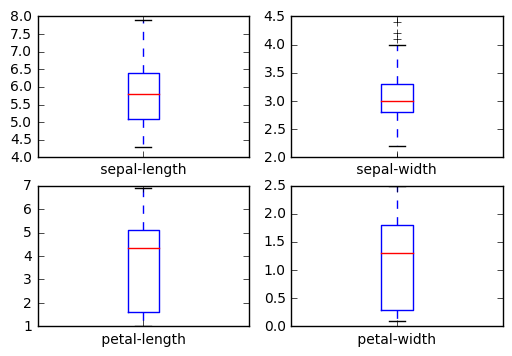

In [9]:
# box and whisker plots
dataset.plot(kind= ' box ' , subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

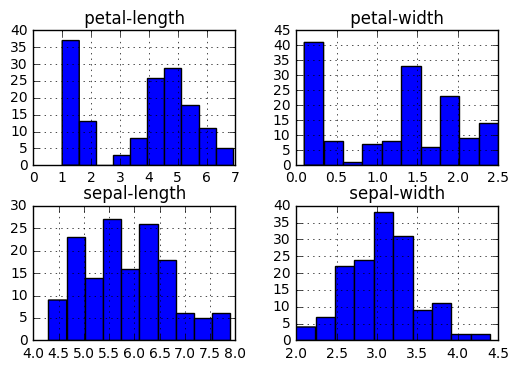

In [10]:
# histograms
dataset.hist()
plt.show()

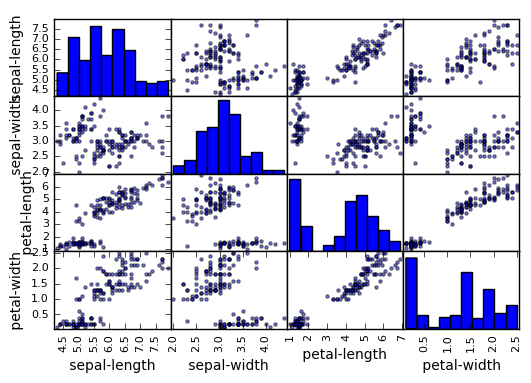

In [11]:
# scatter plot matrix
scatter_matrix(dataset)
plt.show()

## Now we will create some models of the data and estimate their accuracy on unseen data using following steps
1. Separate out a validation dataset.
2. Setup the test harness to use 10-fold cross validation.
3. Build 5 different models to predict species from flower measurements
4. Select the best model.

## Creating a validation Dataset

In [12]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = cross_validation.train_test_split(X, Y,
test_size=validation_size, random_state=seed)

## Test Harness

Using 10-fold cross validation to estimate accuracy.This will split the dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.

In [16]:
# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'

In [17]:
# Spot-Check Algorithms
models = []
models.append(( ' LR ' , LogisticRegression()))
models.append(( ' LDA ' , LinearDiscriminantAnalysis()))
models.append(( ' KNN ' , KNeighborsClassifier()))
models.append(( ' CART ' , DecisionTreeClassifier()))
models.append(( ' NB ' , GaussianNB()))
models.append(( ' SVM ' , SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

 LR : 0.966667 (0.040825)
 LDA : 0.975000 (0.038188)
 KNN : 0.983333 (0.033333)
 CART : 0.975000 (0.038188)
 NB : 0.975000 (0.053359)
 SVM : 0.991667 (0.025000)


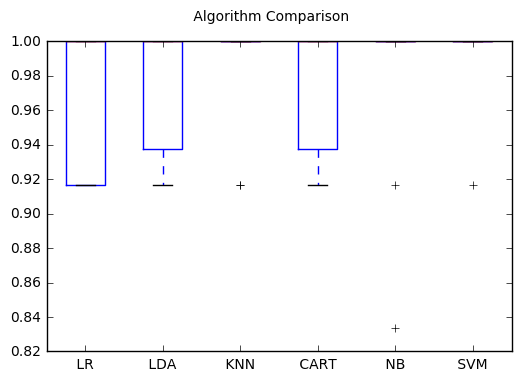

In [18]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle( ' Algorithm Comparison ' )
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [19]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
             precision    recall  f1-score   support

Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
Iris-virginica       0.90      0.82      0.86        11

avg / total       0.90      0.90      0.90        30



## We can see that the accuracy is 0.9 or 90%. The confusion matrix provides an indication ofthe three errors made. Finally the classification report provides a breakdown of each class by precision, recall, f1-score and support showing excellent results